<font size="+0.5">Load libraries and data.</font>

In [1]:
# Ignore warnings 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [2]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from scipy.signal import savgol_filter
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.class_weight import compute_class_weight

In [3]:
data1 = pd.read_csv('data/data_accelerometer_gyroscope_16.csv')
data2 = pd.read_csv('data/data_accelerometer_gyroscope_17.csv')
data3 = pd.read_csv('data/data_accelerometer_gyroscope_20.csv')
data4 = pd.read_csv('data/data_accelerometer_gyroscope_21.csv')

# <center> Data filtering

### <center> Accelerometer data filtering

<font size="+0.5">Look at both curves: initial and filtered and find the <i><b>window lenght</b></i> which allows us to describe data in the best way.</font>

In [4]:
window_lengths = np.arange(11, 151, 10)
polyorder = 3

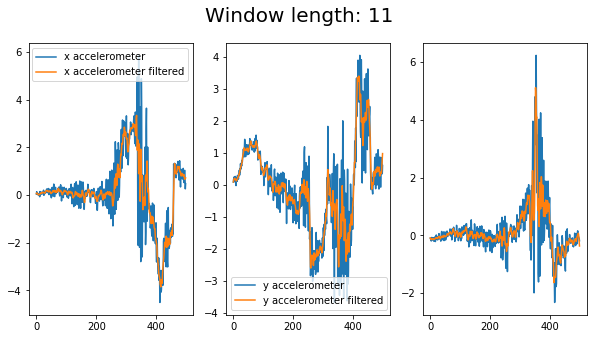

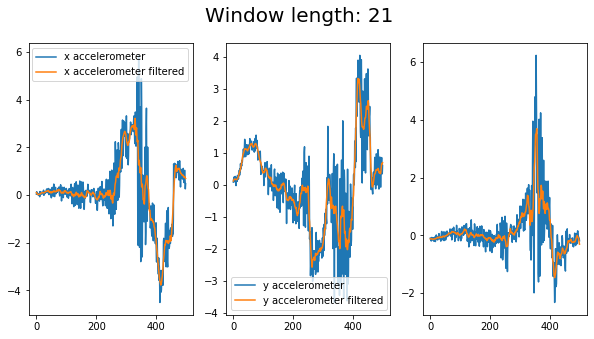

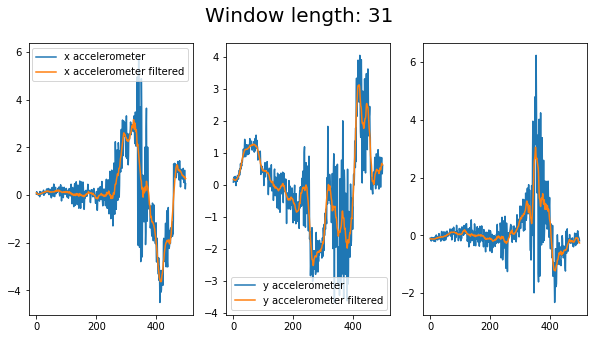

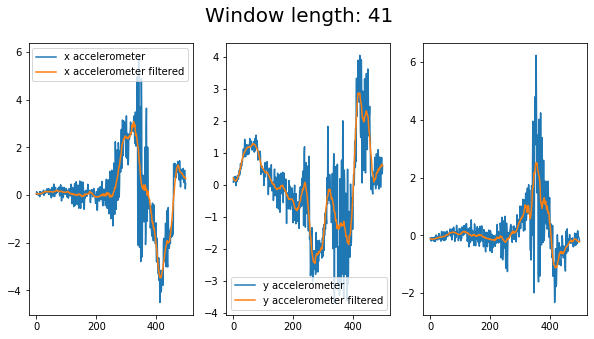

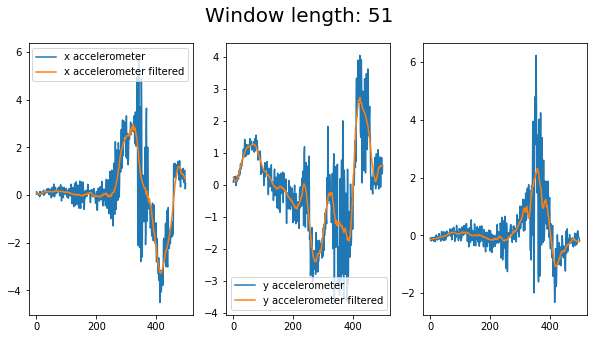

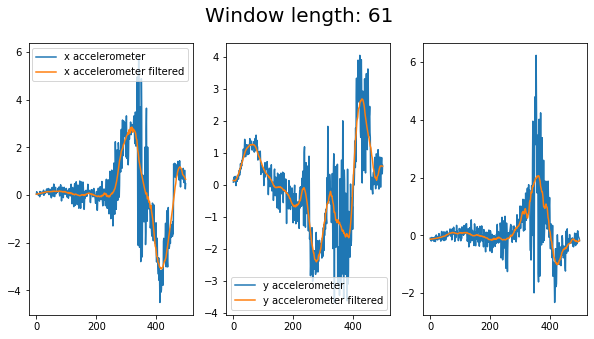

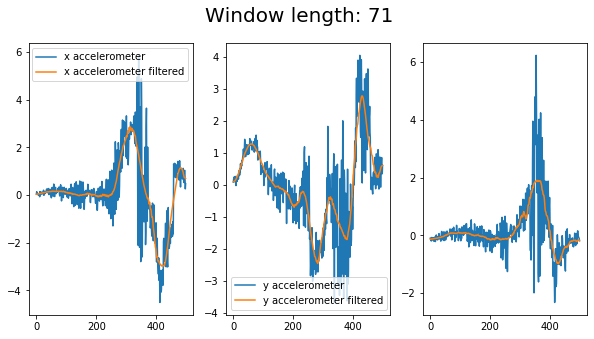

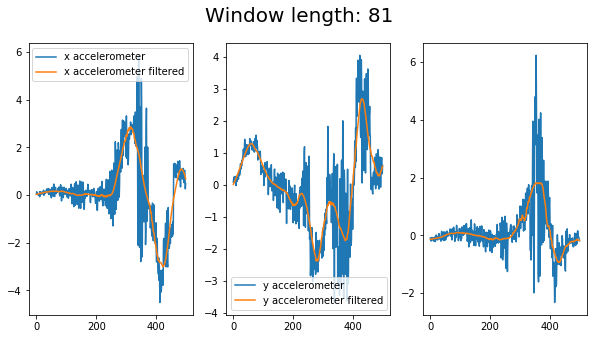

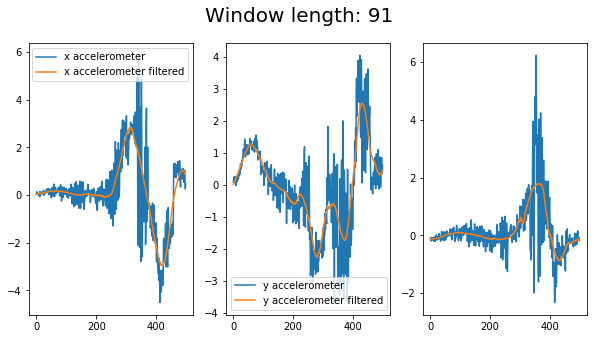

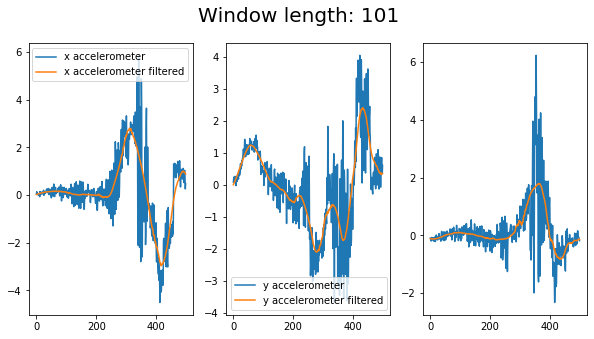

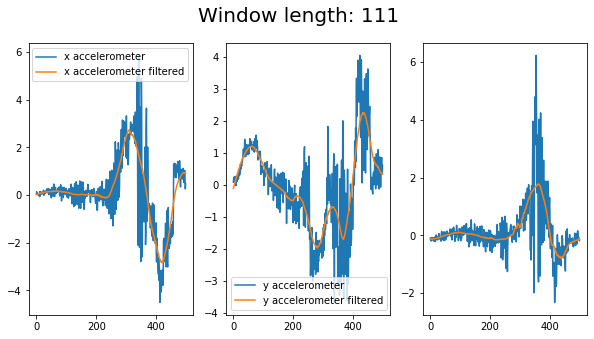

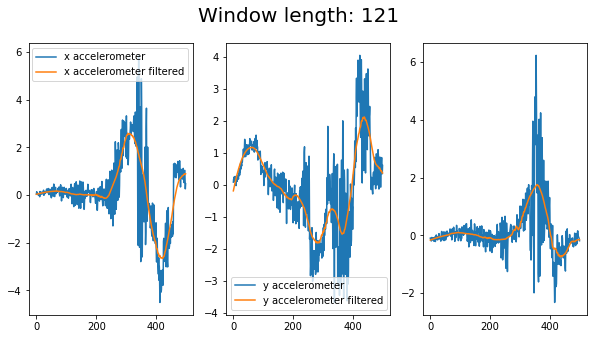

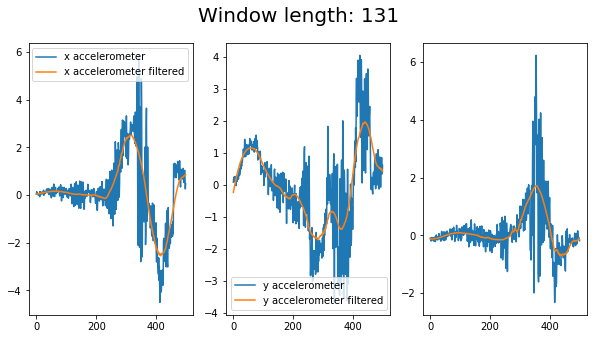

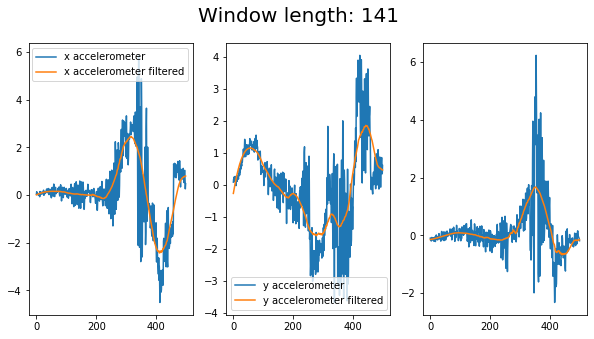

In [5]:
for window_length in window_lengths:
    
    data1['x_accelerometer_fil'] = savgol_filter(data1['x_accelerometer'].values, window_length, polyorder)
    data1['y_accelerometer_fil'] = savgol_filter(data1['y_accelerometer'].values, window_length, polyorder)
    data1['z_accelerometer_fil'] = savgol_filter(data1['z_accelerometer'].values, window_length, polyorder)
    
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    
    ax[0].plot(data1[:500]['x_accelerometer'].values, label='x accelerometer')
    ax[0].plot(data1[:500]['x_accelerometer_fil'].values, label='x accelerometer filtered')
    ax[0].legend();
    
    ax[1].plot(data1[:500]['y_accelerometer'].values, label='y accelerometer')
    ax[1].plot(data1[:500]['y_accelerometer_fil'].values, label='y accelerometer filtered')
    ax[1].legend();
    
    ax[2].plot(data1[:500]['z_accelerometer'].values, label='z accelerometer')
    ax[2].plot(data1[:500]['z_accelerometer_fil'].values, label='z accelerometer filtered')
    plt.suptitle(f"Window length: {window_length}", fontsize=20)
    

<font size="+0.5">Look at both curves: initial and filtered and find the <i><b>polyorder</b></i> which allows us to describe data in the best way.</font>

In [6]:
polyorders = np.arange(2, 15, 1)
window_length = 51

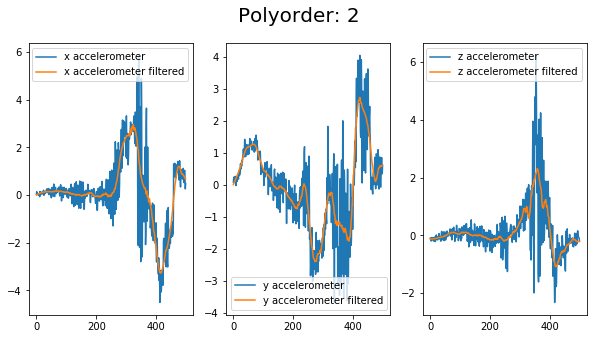

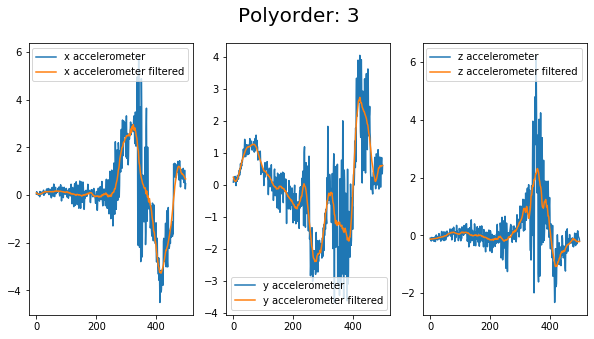

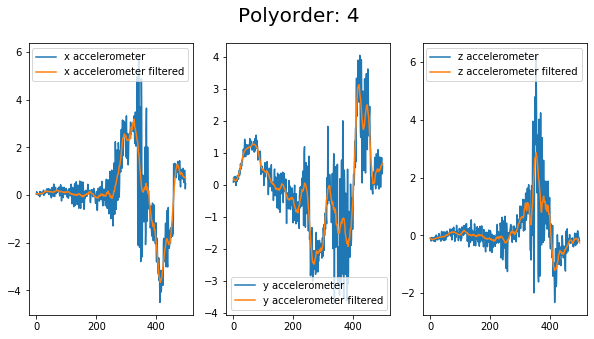

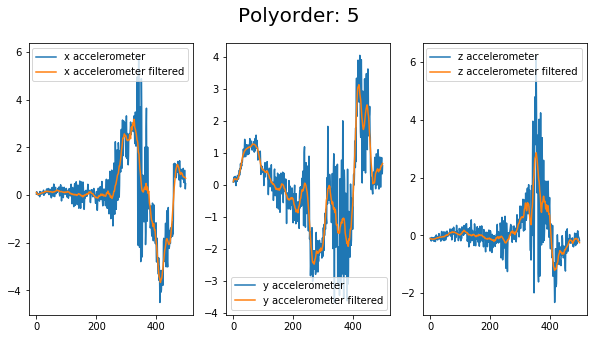

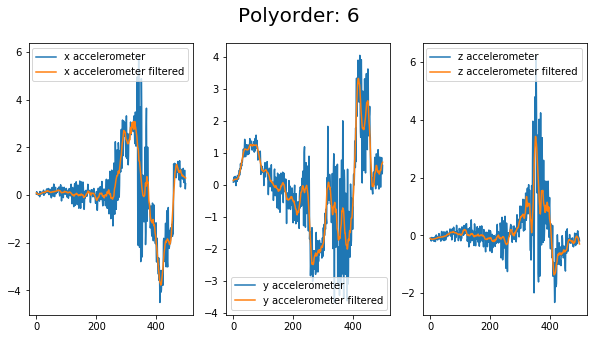

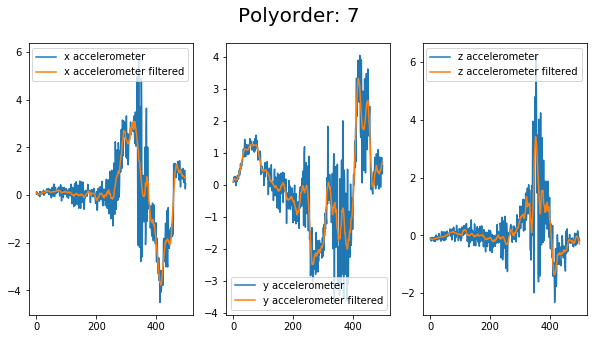

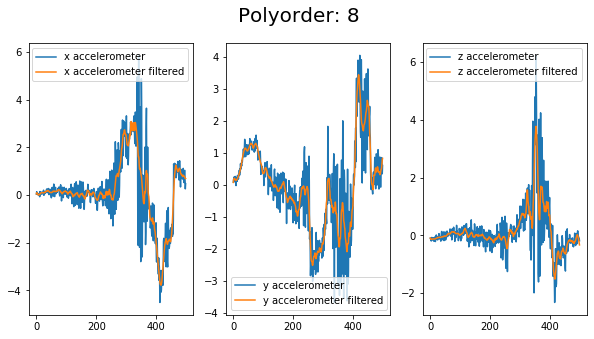

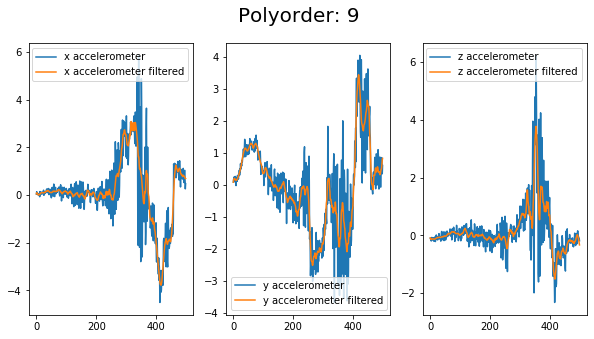

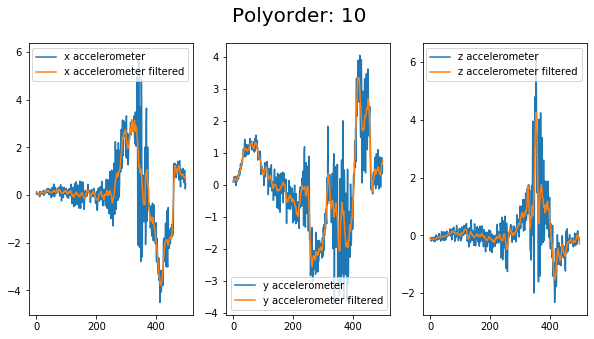

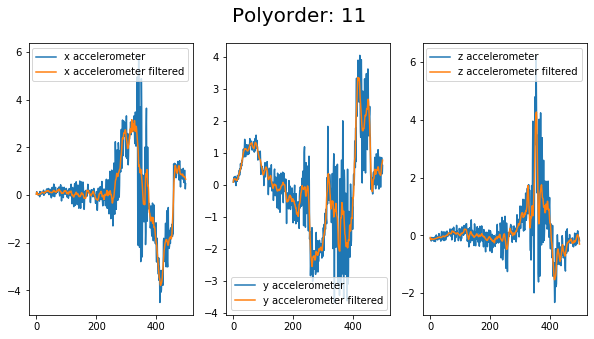

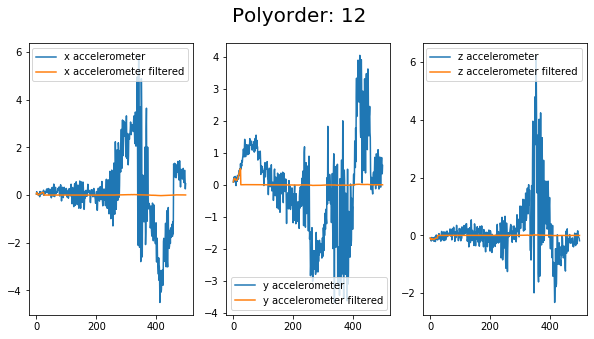

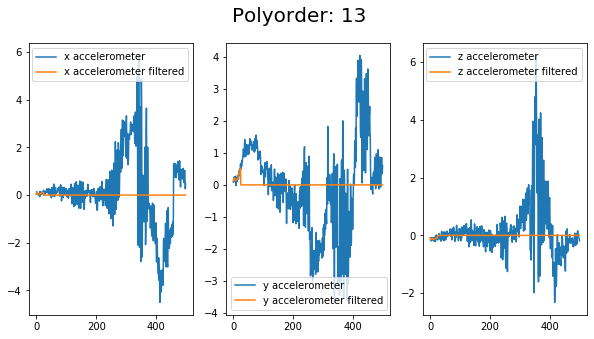

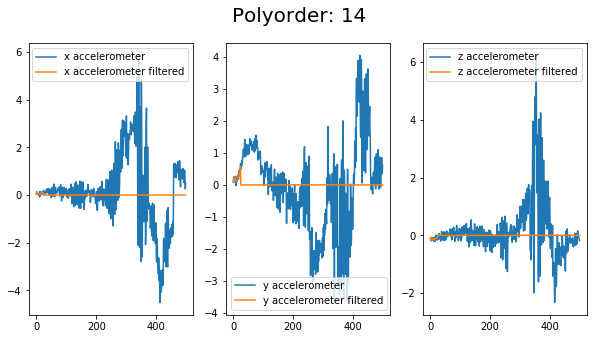

In [7]:
for polyorder in polyorders:
    
    data1['x_accelerometer_fil'] = savgol_filter(data1['x_accelerometer'].values, window_length, polyorder)
    data1['y_accelerometer_fil'] = savgol_filter(data1['y_accelerometer'].values, window_length, polyorder)
    data1['z_accelerometer_fil'] = savgol_filter(data1['z_accelerometer'].values, window_length, polyorder)
    
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    
    ax[0].plot(data1[:500]['x_accelerometer'].values, label='x accelerometer')
    ax[0].plot(data1[:500]['x_accelerometer_fil'].values, label='x accelerometer filtered')
    ax[0].legend();
    
    ax[1].plot(data1[:500]['y_accelerometer'].values, label='y accelerometer')
    ax[1].plot(data1[:500]['y_accelerometer_fil'].values, label='y accelerometer filtered')
    ax[1].legend();
    
    ax[2].plot(data1[:500]['z_accelerometer'].values, label='z accelerometer')
    ax[2].plot(data1[:500]['z_accelerometer_fil'].values, label='z accelerometer filtered')
    plt.suptitle(f"Polyorder: {polyorder}", fontsize=20)
    ax[2].legend();
    plt.show();
    

In [8]:
polyorder = 5

<font size="+0.5">Use selected parameters to filter accelerometer data.</font>

In [9]:
data1['x_accelerometer_fil'] = savgol_filter(data1['x_accelerometer'].values, window_length, polyorder)
data1['y_accelerometer_fil'] = savgol_filter(data1['y_accelerometer'].values, window_length, polyorder)
data1['z_accelerometer_fil'] = savgol_filter(data1['z_accelerometer'].values, window_length, polyorder)

In [10]:
data2['x_accelerometer_fil'] = savgol_filter(data2['x_accelerometer'].values, window_length, polyorder)
data2['y_accelerometer_fil'] = savgol_filter(data2['y_accelerometer'].values, window_length, polyorder)
data2['z_accelerometer_fil'] = savgol_filter(data2['z_accelerometer'].values, window_length, polyorder)

In [11]:
data3['x_accelerometer_fil'] = savgol_filter(data3['x_accelerometer'].values, window_length, polyorder)
data3['y_accelerometer_fil'] = savgol_filter(data3['y_accelerometer'].values, window_length, polyorder)
data3['z_accelerometer_fil'] = savgol_filter(data3['z_accelerometer'].values, window_length, polyorder)

In [12]:
data4['x_accelerometer_fil'] = savgol_filter(data4['x_accelerometer'].values, window_length, polyorder)
data4['y_accelerometer_fil'] = savgol_filter(data4['y_accelerometer'].values, window_length, polyorder)
data4['z_accelerometer_fil'] = savgol_filter(data4['z_accelerometer'].values, window_length, polyorder)

### <center> Gyroscope data filtering

<font size="+0.5">Use the approach, described above, to select parameters for gyroscope filtering.</font>

In [13]:
window_lengths = np.arange(11, 151, 10)
polyorder = 3

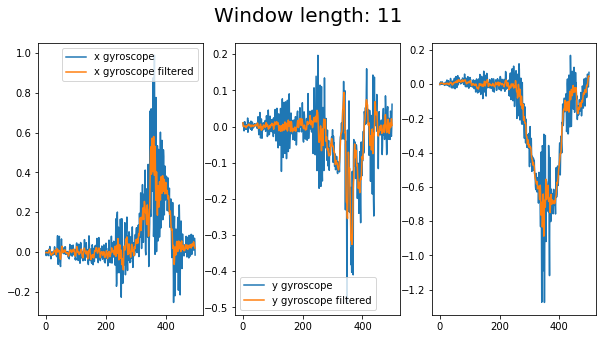

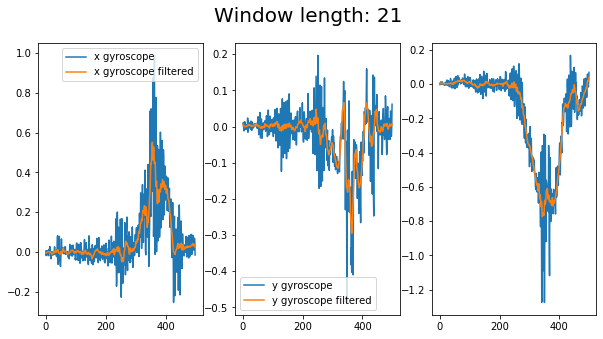

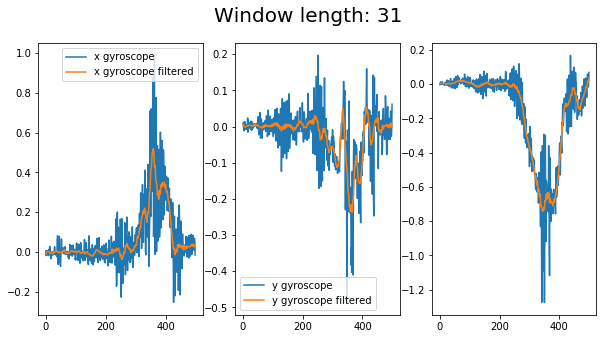

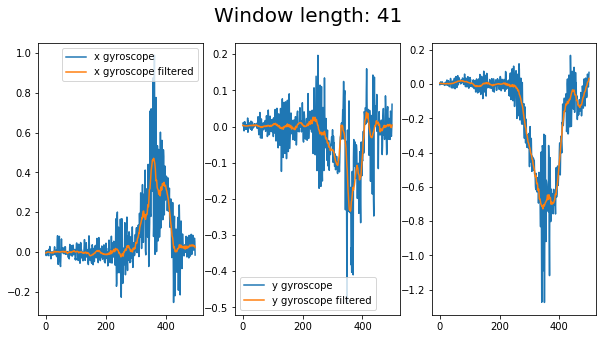

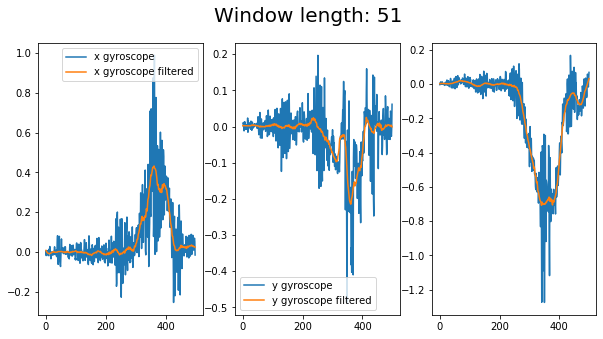

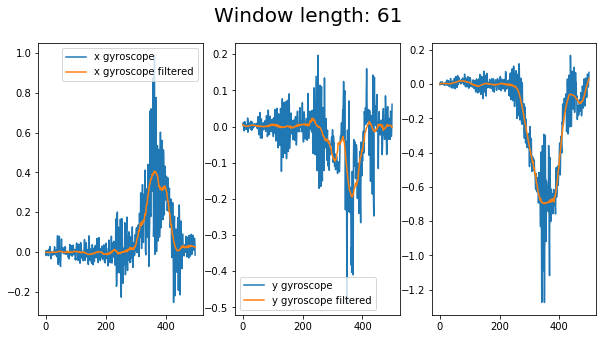

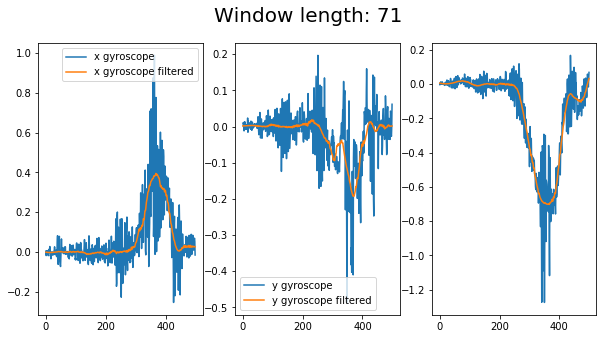

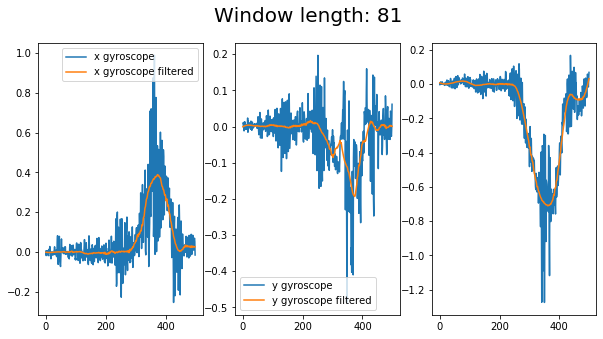

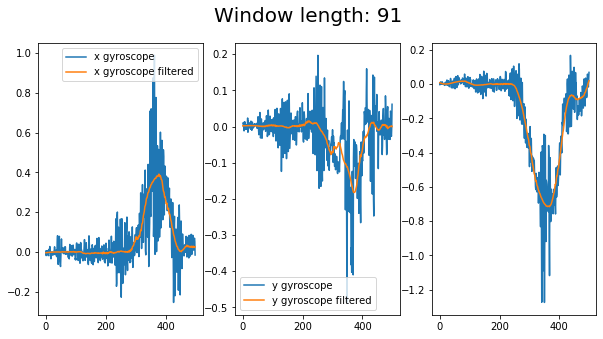

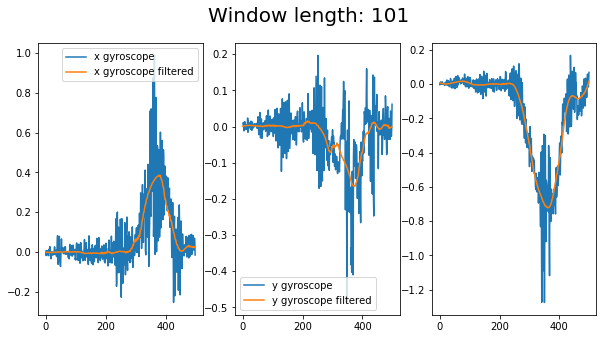

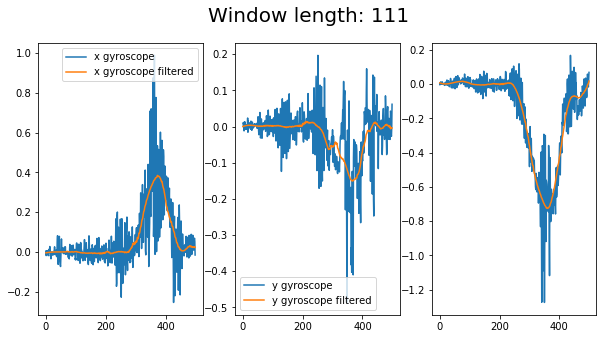

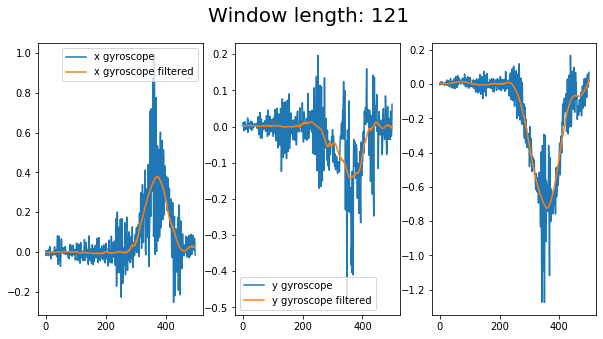

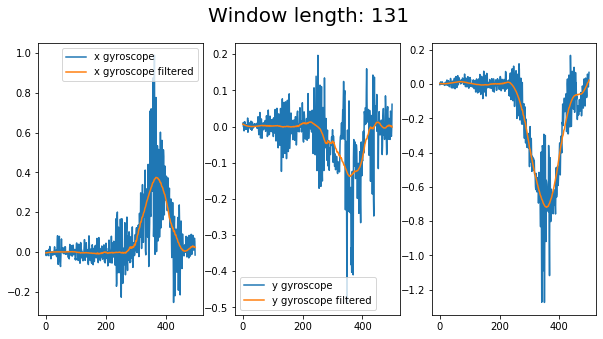

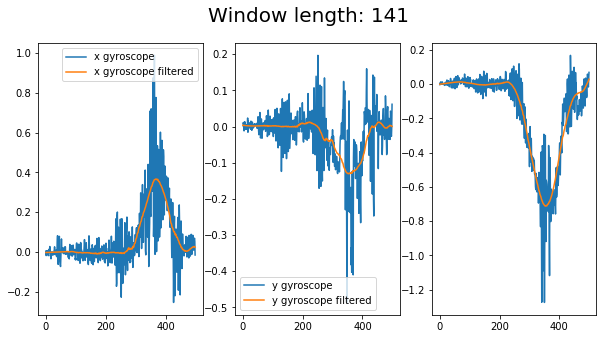

In [14]:
for window_length in window_lengths:
    
    data1['x_gyroscope_fil'] = savgol_filter(data1['x_gyroscope'].values, window_length, polyorder)
    data1['y_gyroscope_fil'] = savgol_filter(data1['y_gyroscope'].values, window_length, polyorder)
    data1['z_gyroscope_fil'] = savgol_filter(data1['z_gyroscope'].values, window_length, polyorder)
    
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    
    ax[0].plot(data1[:500]['x_gyroscope'].values, label='x gyroscope')
    ax[0].plot(data1[:500]['x_gyroscope_fil'].values, label='x gyroscope filtered')
    ax[0].legend();
    
    ax[1].plot(data1[:500]['y_gyroscope'].values, label='y gyroscope')
    ax[1].plot(data1[:500]['y_gyroscope_fil'].values, label='y gyroscope filtered')
    ax[1].legend();
    
    ax[2].plot(data1[:500]['z_gyroscope'].values, label='z gyroscope')
    ax[2].plot(data1[:500]['z_gyroscope_fil'].values, label='z gyroscope filtered')
    plt.suptitle(f"Window length: {window_length}", fontsize=20)

In [15]:
polyorders = np.arange(2, 15, 1)
window_length = 31

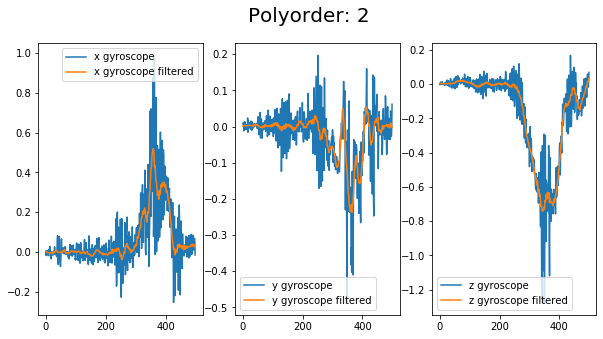

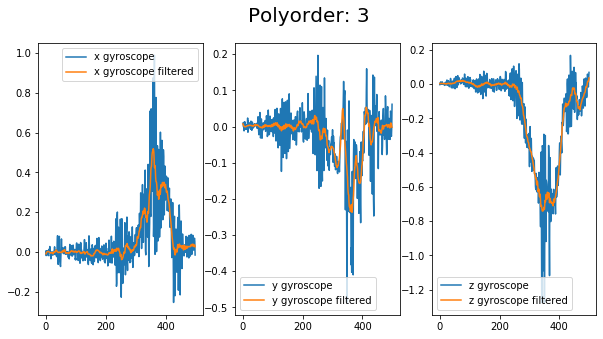

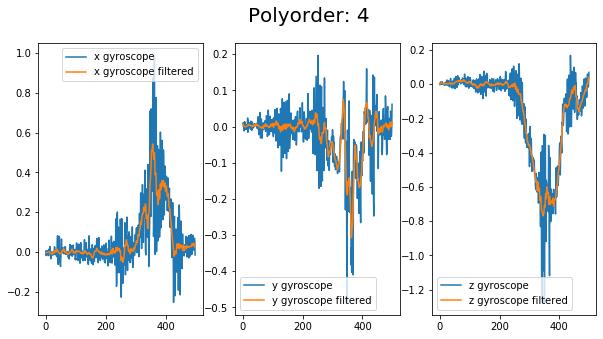

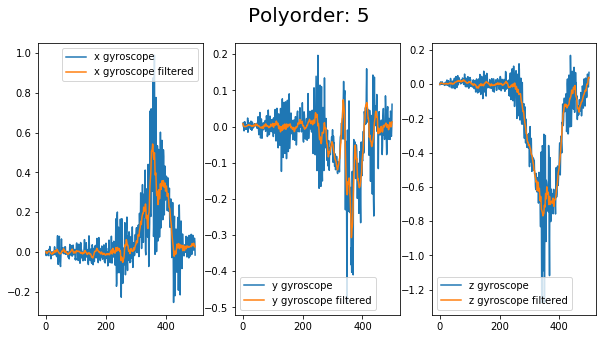

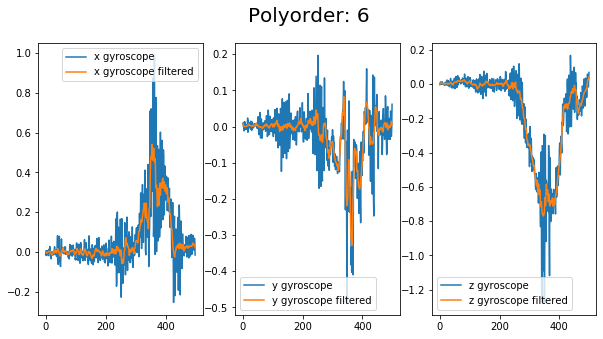

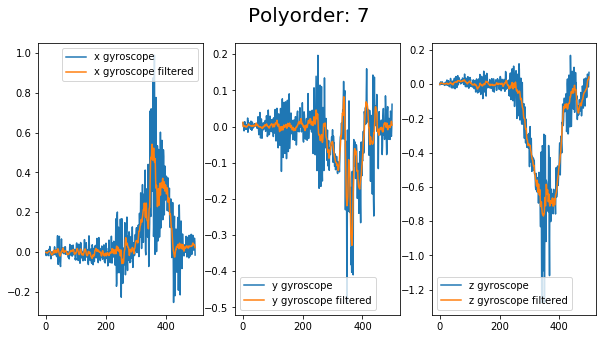

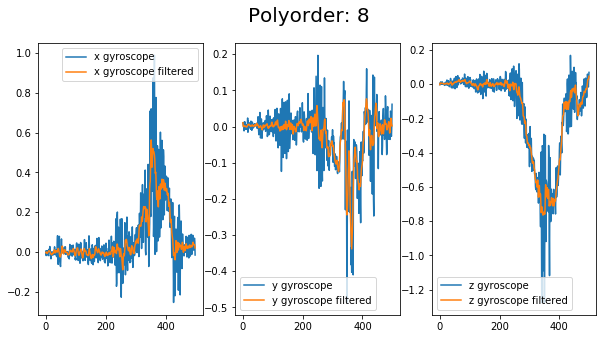

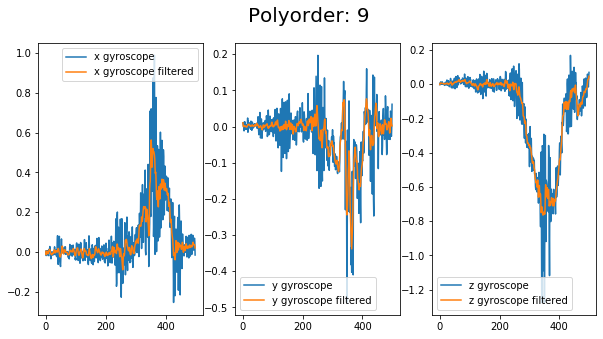

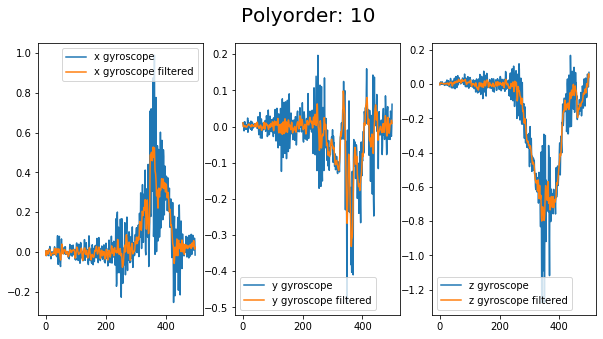

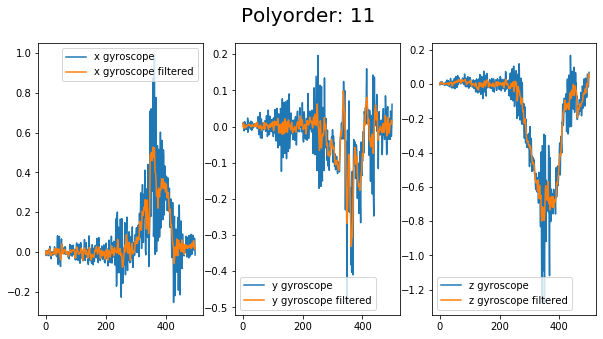

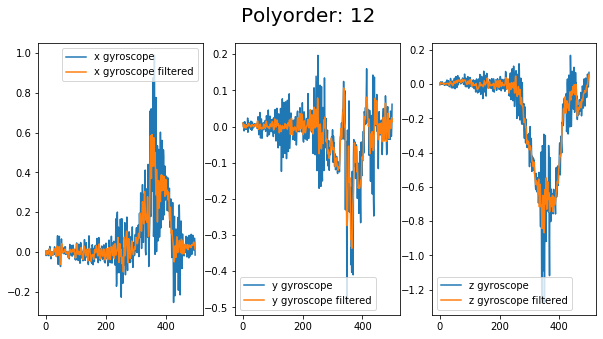

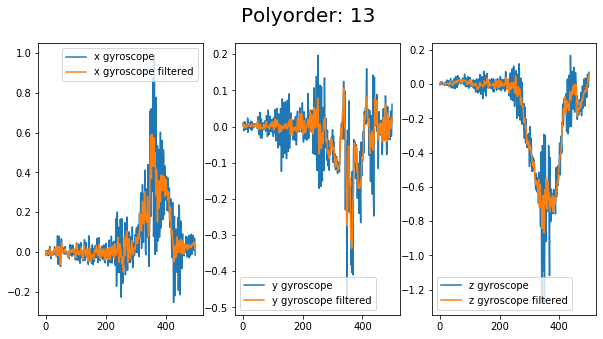

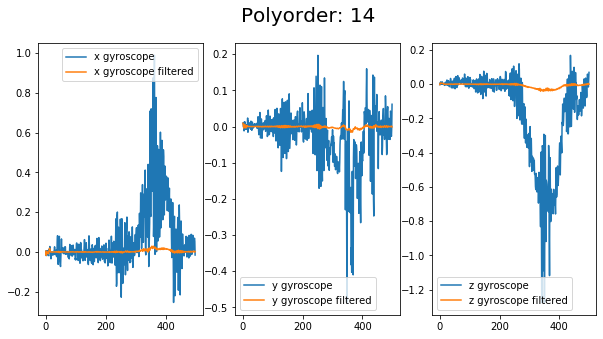

In [16]:
for polyorder in polyorders:
    
    data1['x_gyroscope_fil'] = savgol_filter(data1['x_gyroscope'].values, window_length, polyorder)
    data1['y_gyroscope_fil'] = savgol_filter(data1['y_gyroscope'].values, window_length, polyorder)
    data1['z_gyroscope_fil'] = savgol_filter(data1['z_gyroscope'].values, window_length, polyorder)
    
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    
    ax[0].plot(data1[:500]['x_gyroscope'].values, label='x gyroscope')
    ax[0].plot(data1[:500]['x_gyroscope_fil'].values, label='x gyroscope filtered')
    ax[0].legend();
    
    ax[1].plot(data1[:500]['y_gyroscope'].values, label='y gyroscope')
    ax[1].plot(data1[:500]['y_gyroscope_fil'].values, label='y gyroscope filtered')
    ax[1].legend();
    
    ax[2].plot(data1[:500]['z_gyroscope'].values, label='z gyroscope')
    ax[2].plot(data1[:500]['z_gyroscope_fil'].values, label='z gyroscope filtered')
    plt.suptitle(f"Polyorder: {polyorder}", fontsize=20)
    ax[2].legend();
    plt.show();
    

In [17]:
polyorder = 4

In [18]:
data1['x_gyroscope_fil'] = savgol_filter(data1['x_gyroscope'].values, window_length, polyorder)
data1['y_gyroscope_fil'] = savgol_filter(data1['y_gyroscope'].values, window_length, polyorder)
data1['z_gyroscope_fil'] = savgol_filter(data1['z_gyroscope'].values, window_length, polyorder)

In [19]:
data2['x_gyroscope_fil'] = savgol_filter(data2['x_gyroscope'].values, window_length, polyorder)
data2['y_gyroscope_fil'] = savgol_filter(data2['y_gyroscope'].values, window_length, polyorder)
data2['z_gyroscope_fil'] = savgol_filter(data2['z_gyroscope'].values, window_length, polyorder)

In [20]:
data3['x_gyroscope_fil'] = savgol_filter(data3['x_gyroscope'].values, window_length, polyorder)
data3['y_gyroscope_fil'] = savgol_filter(data3['y_gyroscope'].values, window_length, polyorder)
data3['z_gyroscope_fil'] = savgol_filter(data3['z_gyroscope'].values, window_length, polyorder)

In [21]:
data4['x_gyroscope_fil'] = savgol_filter(data4['x_gyroscope'].values, window_length, polyorder)
data4['y_gyroscope_fil'] = savgol_filter(data4['y_gyroscope'].values, window_length, polyorder)
data4['z_gyroscope_fil'] = savgol_filter(data4['z_gyroscope'].values, window_length, polyorder)

<font size="+0.5">Concatenate all data.</font>

In [22]:
data = pd.concat([data1, data2, data3, data4])

In [23]:
data = data.reset_index()
data = data.drop(['index'], axis = 1)

In [24]:
data.tail()

,timestamp,uptimeNanos,x_accelerometer,y_accelerometer,z_accelerometer,x_gyroscope,y_gyroscope,z_gyroscope,time_duration,event,x_accelerometer_fil,y_accelerometer_fil,z_accelerometer_fil,x_gyroscope_fil,y_gyroscope_fil,z_gyroscope_fil
11156,15/05/2016 16:16:54,11987612491597,-0.124296,0.935977,1.376339,-0.136311,-0.261519,-0.407217,787,Non-aggressive event,0.207550,0.238406,-0.489860,0.039031,-0.071575,-0.094383
11157,15/05/2016 16:16:54,11987632116197,-3.752130,3.571104,-2.734614,0.357359,-0.416205,-0.494990,787,Non-aggressive event,0.466171,0.122275,-0.293466,0.027515,-0.052371,-0.075511
11158,15/05/2016 16:16:54,11987651771316,-1.113065,-1.261395,-1.718518,0.245371,-0.139201,0.024801,787,Non-aggressive event,0.765291,-0.024139,-0.005510,0.004007,-0.019139,-0.050777
11159,15/05/2016 16:16:54,11987671395915,2.773421,-1.653033,1.756519,-0.187505,0.232658,0.297094,787,Non-aggressive event,1.108637,-0.204046,0.390268,-0.034156,0.031103,-0.019301
11160,15/05/2016 16:16:54,11987691020514,2.641720,0.102090,1.454504,-0.145284,0.112696,-0.059151,787,Non-aggressive event,1.500070,-0.420747,0.911576,-0.089843,0.101570,0.019849


<font size="+0.5">Plots which show difference between the initial and filtered values.</font>

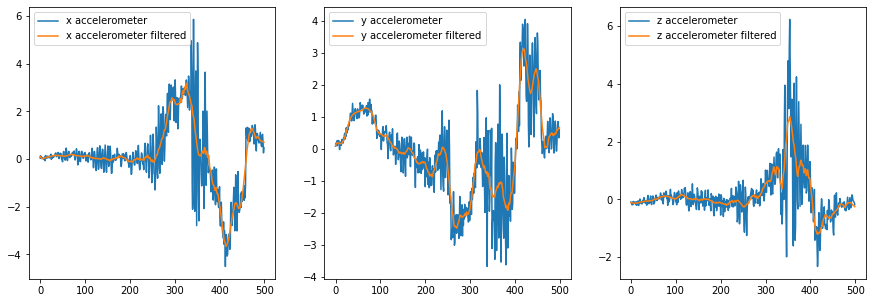

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
ax[0].plot(data[:500]['x_accelerometer'].values, label='x accelerometer')
ax[0].plot(data[:500]['x_accelerometer_fil'].values, label='x accelerometer filtered')
ax[0].legend();

ax[1].plot(data[:500]['y_accelerometer'].values, label='y accelerometer')
ax[1].plot(data[:500]['y_accelerometer_fil'].values, label='y accelerometer filtered')
ax[1].legend();

ax[2].plot(data[:500]['z_accelerometer'].values, label='z accelerometer')
ax[2].plot(data[:500]['z_accelerometer_fil'].values, label='z accelerometer filtered')
ax[2].legend();

plt.show();

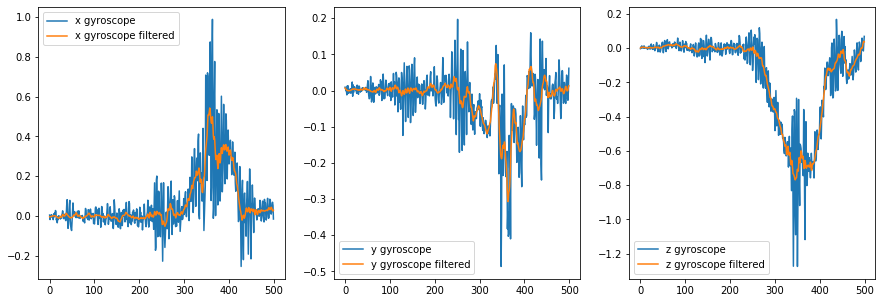

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
ax[0].plot(data[:500]['x_gyroscope'].values, label='x gyroscope')
ax[0].plot(data[:500]['x_gyroscope_fil'].values, label='x gyroscope filtered')
ax[0].legend();

ax[1].plot(data[:500]['y_gyroscope'].values, label='y gyroscope')
ax[1].plot(data[:500]['y_gyroscope_fil'].values, label='y gyroscope filtered')
ax[1].legend();

ax[2].plot(data[:500]['z_gyroscope'].values, label='z gyroscope')
ax[2].plot(data[:500]['z_gyroscope_fil'].values, label='z gyroscope filtered')
ax[2].legend();

plt.show();

# <center> Data preprocessing

<font size="+0.5">Label encoding.</font>

<font size="+0.5">Divide data into 3 categories, then encode them.</font>

In [27]:
label_dict = {"Aggressive acceleration": "critical",
         "Aggressive breaking": "critical", 
         "Aggressive left lane change": "significant",
         "Aggressive left turn": "significant",
         "Aggressive right lane change": "significant",
         "Aggressive right turn": "significant",
         "Non-aggressive event": "negligible"}

In [28]:
def change_label(row):
    return label_dict[row['event']]

In [29]:
data['event_label'] = data.apply(change_label, axis=1)

In [30]:
data.head()

,timestamp,uptimeNanos,x_accelerometer,y_accelerometer,z_accelerometer,x_gyroscope,y_gyroscope,z_gyroscope,time_duration,event,x_accelerometer_fil,y_accelerometer_fil,z_accelerometer_fil,x_gyroscope_fil,y_gyroscope_fil,z_gyroscope_fil,event_label
0,14/05/2016 10:54:35,11539034593270,0.039886,0.085735,-0.093183,0.004470,0.009398,-0.002575,2,Non-aggressive event,0.112064,0.099807,-0.115853,-0.004287,0.007023,0.000821,negligible
1,14/05/2016 10:54:35,11539053851625,0.141136,0.180840,-0.101005,-0.018279,0.007015,0.007037,2,Non-aggressive event,0.078692,0.141873,-0.118248,-0.004187,0.005186,0.003043,negligible
2,14/05/2016 10:54:35,11539073476224,0.048727,0.133385,-0.183827,0.001196,-0.000405,0.001179,2,Non-aggressive event,0.054416,0.169328,-0.120858,-0.003719,0.003630,0.004593,negligible
3,14/05/2016 10:54:35,11539093100824,0.095980,0.250396,-0.111719,-0.004479,0.000623,0.013621,2,Non-aggressive event,0.037768,0.185177,-0.123490,-0.003007,0.002345,0.005579,negligible
4,14/05/2016 10:54:35,11539112694904,0.021541,0.098266,-0.187710,0.006300,-0.011864,0.003479,2,Non-aggressive event,0.027424,0.192126,-0.125977,-0.002162,0.001319,0.006099,negligible


In [31]:
encoder = LabelEncoder()
data['event_label_num'] = encoder.fit_transform(data['event_label'])

In [32]:
with open("models/encoder.pcl", "wb") as file:
    pickle.dump(encoder, file)

<font size="+0.5">Look at histogramm of the target class.</font>

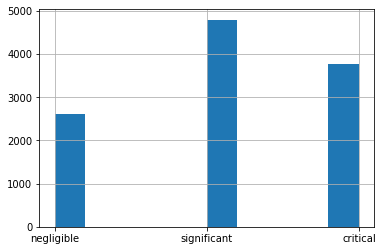

In [33]:
data['event_label'].hist();

<font size="+0.5">Data normalisation.</font>

<font size="+0.5">Data normalization is required because, linear models have to work with normilized data.</font>

In [34]:
normalizer = StandardScaler()
data['x_accelerometer_fil_scaled'] = normalizer.fit_transform(data['x_accelerometer_fil'].values.reshape(-1, 1))
data['y_accelerometer_fil_scaled'] = normalizer.fit_transform(data['y_accelerometer_fil'].values.reshape(-1, 1))
data['z_accelerometer_fil_scaled'] = normalizer.fit_transform(data['z_accelerometer_fil'].values.reshape(-1, 1))

<font size="+0.5">Plots which show difference between the initial, filtered  and normilized values.</font>

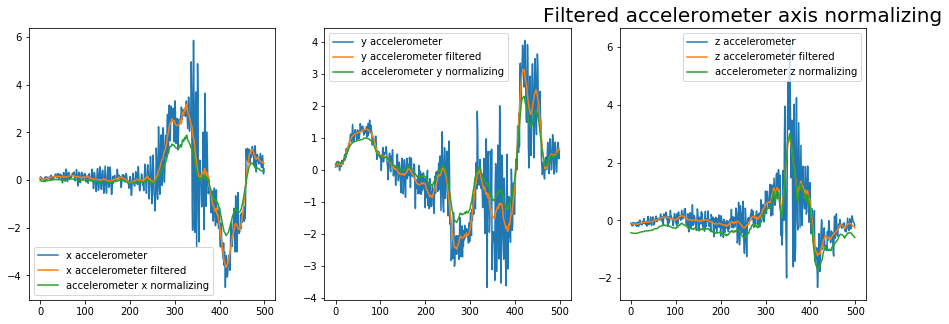

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
ax[0].plot(data[:500]['x_accelerometer'].values, label='x accelerometer')
ax[0].plot(data[:500]['x_accelerometer_fil'].values, label='x accelerometer filtered')
ax[0].plot(data[:500]['x_accelerometer_fil_scaled'].values, label='accelerometer x normalizing')
ax[0].legend();

ax[1].plot(data[:500]['y_accelerometer'].values, label='y accelerometer')
ax[1].plot(data[:500]['y_accelerometer_fil'].values, label='y accelerometer filtered')
ax[1].plot(data[:500]['y_accelerometer_fil_scaled'].values, label='accelerometer y normalizing')
ax[1].legend();

ax[2].plot(data[:500]['z_accelerometer'].values, label='z accelerometer')
ax[2].plot(data[:500]['z_accelerometer_fil'].values, label='z accelerometer filtered')
ax[2].plot(data[:500]['z_accelerometer_fil_scaled'].values, label='accelerometer z normalizing')
ax[2].legend();

plt.title('Filtered accelerometer axis normalizing', fontsize=20)
plt.show();

# <center> Feature engineering

<font size="+0.5">Add acceleration feature.</font>

In [36]:
data['acceleration'] = np.sqrt(data['x_accelerometer']**2 + data['y_accelerometer']**2 + data['z_accelerometer']**2)
data['acceleration_fil'] = np.sqrt(data['x_accelerometer_fil']**2 + data['y_accelerometer_fil']**2 + data['z_accelerometer_fil']**2)
data['acceleration_fil_scaled'] = np.sqrt(data['x_accelerometer_fil_scaled']**2 + data['y_accelerometer_fil_scaled']**2 + data['z_accelerometer_fil_scaled']**2)

# <center> Training and evaluating

### <center> Linear models

<font size="+0.5">Split data into train and test</font>

In [37]:
x = data[['x_accelerometer_fil_scaled', 'y_accelerometer_fil_scaled', 'z_accelerometer_fil_scaled', 'acceleration_fil_scaled', "x_gyroscope_fil", "y_gyroscope_fil", "z_gyroscope_fil"]]
y = data['event_label_num']

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state = 42, shuffle = True)

<font size="+0.5">The histogramm shows us that the target class isn't balanced. We can't use downsampling or upsampling to balance the data, because the dataset is quite small, so we decided to use class weight.</font>

In [38]:
class_weight = dict(zip(np.unique(y), compute_class_weight('balanced', np.unique(y), y)))

In [39]:
clf_lr = LogisticRegression(class_weight=class_weight, random_state = 42)
clf_lr.fit(x_train, y_train)
lr_predict_val = clf_lr.predict(x_val)
lr_predict_train = clf_lr.predict(x_train)
print(f"Train accuracy: {accuracy_score(lr_predict_train, y_train)}")
print(f"Validation accuracy: {accuracy_score(lr_predict_val, y_val)}")

Train accuracy: 0.609094982078853
Validation accuracy: 0.6157635467980296


In [40]:
clf_pac = PassiveAggressiveClassifier(class_weight=class_weight, random_state=42)
clf_pac.fit(x_train, y_train)
pac_predict_val = clf_pac.predict(x_val)
pac_predict_train = clf_pac.predict(x_train)
print(f"Train accuracy: {accuracy_score(pac_predict_train, y_train)}")
print(f"Validation accuracy: {accuracy_score(pac_predict_val, y_val)}")

Train accuracy: 0.5294578853046595
Validation accuracy: 0.5584415584415584


In [41]:
clf_svc = SVC(class_weight=class_weight, random_state=42)
clf_svc.fit(x_train, y_train)
svc_predict_val = clf_svc.predict(x_val)
svc_predict_train = clf_svc.predict(x_train)
print(f"Train accuracy: {accuracy_score(svc_predict_train, y_train)}")
print(f"Validation accuracy: {accuracy_score(svc_predict_val, y_val)}")

Train accuracy: 0.7886424731182796
Validation accuracy: 0.7881773399014779


In [42]:
clf_pcp = MLPClassifier(random_state=42, solver='lbfgs', max_iter=1000, hidden_layer_sizes=50)
clf_pcp.fit(x_train, y_train)
pcp_predict_val = clf_pcp.predict(x_val)
pcp_predict_train = clf_pcp.predict(x_train)
print(f"Train accuracy: {accuracy_score(pcp_predict_train, y_train)}")
print(f"Validation accuracy: {accuracy_score(pcp_predict_val, y_val)}")

Train accuracy: 0.9526209677419355
Validation accuracy: 0.935064935064935


<font size="+0.5">Use GridSearch to find better parameters for linear models with the best performance.</font>

In [43]:
param_svc = {
    "C": np.arange(18, 21, 1),
    'gamma': np.arange(12, 17, 1)
            }
clf_grid = GridSearchCV(SVC(class_weight=class_weight, random_state=42), param_svc, scoring=make_scorer(accuracy_score), verbose=1, n_jobs=-1)
clf_grid.fit(x_train, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   31.4s finished


In [44]:
best_svc_estimator = clf_grid.best_estimator_
grid_predict_val = best_svc_estimator.predict(x_val)
grid_predict_train = best_svc_estimator.predict(x_train)
print(f"Train accuracy: {accuracy_score(grid_predict_train, y_train)}")
print(f"Validation accuracy: {accuracy_score(grid_predict_val, y_val)}")

Train accuracy: 0.9807347670250897
Validation accuracy: 0.9520824003582624


In [45]:
param_mlp = {
    "hidden_layer_sizes": np.arange(50, 200, 50),
    "activation": ["logistic", "tanh", "relu"],
    "solver": ["adam", "lbfgs"],
    "alpha": [1e-5, 1e-4, 1e-3, 1e-2]}
clf_grid = GridSearchCV(MLPClassifier(random_state=42, max_iter=1000), param_mlp, scoring=make_scorer(accuracy_score), verbose=1, n_jobs=-1)
clf_grid.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 23.4min finished


In [46]:
best_mlp_estimator = clf_grid.best_estimator_
grid_predict_val = best_mlp_estimator.predict(x_val)
grid_predict_train = best_mlp_estimator.predict(x_train)
print(f"Train accuracy: {accuracy_score(grid_predict_train, y_train)}")
print(f"Validation accuracy: {accuracy_score(grid_predict_val, y_val)}")

Train accuracy: 0.9689740143369175
Validation accuracy: 0.9493954321540529


### <center> Non-linear models

<font size="+0.5">Split data into train and test</font>

In [47]:
x = data[['x_accelerometer_fil', 'y_accelerometer_fil', 'z_accelerometer_fil', 'acceleration_fil', "x_gyroscope_fil", "y_gyroscope_fil", "z_gyroscope_fil"]]
y = data['event_label_num']
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.8, random_state = 42, shuffle = True)

In [48]:
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(x_train, y_train)
gbc_predict_val = clf_gbc.predict(x_val)
gbc_predict_train = clf_gbc.predict(x_train)
print(f"Train accuracy: {accuracy_score(gbc_predict_train, y_train)}")
print(f"Validation accuracy: {accuracy_score(gbc_predict_val, y_val)}")

Train accuracy: 0.9155465949820788
Validation accuracy: 0.8871473354231975


In [49]:
clf_rfc = RandomForestClassifier(n_estimators=100, class_weight=class_weight, random_state=42)
clf_rfc.fit(x_train, y_train)
rfc_predict_val = clf_rfc.predict(x_val)
rfc_predict_train = clf_rfc.predict(x_train)
print(f"Train accuracy: {accuracy_score(rfc_predict_train, y_train)}")
print(f"Validation accuracy: {accuracy_score(rfc_predict_val, y_val)}")

Train accuracy: 1.0
Validation accuracy: 0.9695476936856248


In [50]:
clf_dtc = DecisionTreeClassifier(random_state=42, class_weight=class_weight)
clf_dtc.fit(x_train, y_train)
dtc_predict_val = clf_dtc.predict(x_val)
dtc_predict_train = clf_dtc.predict(x_train)
print(f"Train accuracy: {accuracy_score(dtc_predict_train, y_train)}")
print(f"Validation accuracy: {accuracy_score(dtc_predict_val, y_val)}")

Train accuracy: 1.0
Validation accuracy: 0.9202866099417824


<font size="+0.5">Use GridSearch to find better parameters for non-linea models with the best performance.</font>

In [51]:
param_forest = {"n_estimators": np.arange(180, 220, 10),
                "max_depth": np.arange(36, 46, 2)}
clf_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1, class_weight=class_weight, random_state=42), param_forest, scoring=make_scorer(accuracy_score), verbose=1, n_jobs=-1)
clf_grid.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   32.6s finished


In [52]:
best_forest_estimator = clf_grid.best_estimator_
grid_predict_val = best_forest_estimator.predict(x_val)
grid_predict_train = best_forest_estimator.predict(x_train)
print(f"Train accuracy: {accuracy_score(grid_predict_train, y_train)}")
print(f"Validation accuracy: {accuracy_score(grid_predict_val, y_val)}")

Train accuracy: 1.0
Validation accuracy: 0.9699955217196596


<font size="+0.5">In the end we decided to check which results we can achieve with boosting.</font>

In [53]:
clf_lgb = lgb.LGBMClassifier(
    n_estimators = 800,
    seed = 42,
    learning_rate = 0.015,
    metric = 'multi_logloss',
    objective = 'multiclass',
    early_stopping = 20)

In [54]:
clf_lgb.fit(X=x_train, y=y_train, eval_set=(x_val, y_val), verbose=0)
lgb_predict_val = clf_lgb.predict(x_val)
lgb_predict_train = clf_lgb.predict(x_train)
print(f"Train accuracy: {accuracy_score(lgb_predict_train, y_train)}")
print(f"Validation accuracy: {accuracy_score(lgb_predict_val, y_val)}")

/home/yhontarenko/main_venv/lib/python3.6/site-packages/lightgbm/engine.py:153: UserWarning: Found `early_stopping` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Train accuracy: 0.9959677419354839
Validation accuracy: 0.961486789072996


In [55]:
with open("models/random_forest.pcl", "wb") as file:
    pickle.dump(best_forest_estimator, file)

In [56]:
with open("models/svc.pcl", "wb") as file:
    pickle.dump(best_svc_estimator, file)